In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
plt.style.use('seaborn-whitegrid')
pres = pd.read_csv("president_heights.csv")
salaries = pd.read_csv("Salaries2.csv")
titanic = pd.read_csv("titanic_clean.csv")
covid = pd.read_csv("national-activity-indicators.csv")
covd_by_state = pd.read_csv("United_States_COVID-19_Cases_and_Deaths_by_State_over_Time(1).csv")
import matplotlib.pyplot as plt

(array([ 1.,  2.,  3.,  5.,  3.,  6., 13.,  3.,  5.,  3.]),
 array([163., 166., 169., 172., 175., 178., 181., 184., 187., 190., 193.]),
 <BarContainer object of 10 artists>)

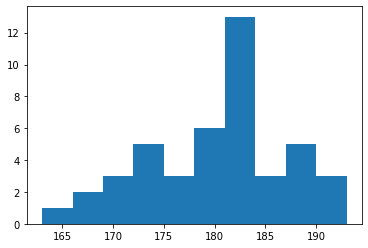

In [8]:
plt.hist(pres['height(cm)'])

In [10]:
import seaborn as sns
sns.__version__

'0.11.2'

In [12]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [16]:
titanic.groupby('Pclass')['Age'].mean()

Pclass
1    38.788981
2    29.868641
3    25.188747
Name: Age, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

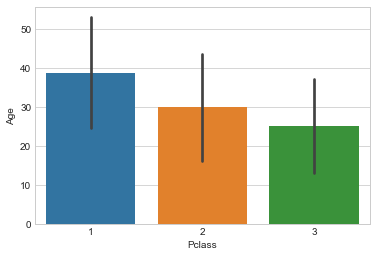

In [23]:
sns.barplot(x = 'Pclass', y='Age', data = titanic, ci='sd')

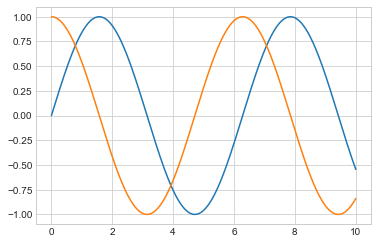

In [39]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))

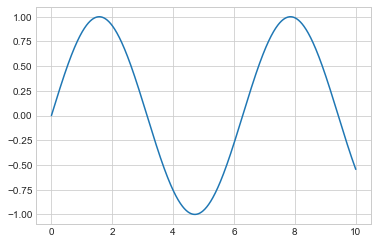

In [35]:
plt.plot(x,np.sin(x))

In [47]:
covid.tail()
covid['weekNum'] = covid.index + 1

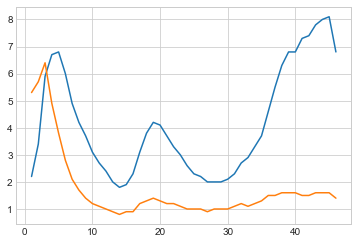

In [55]:
plt.plot(covid['weekNum'], covid['% of Visits for CLI (NSSP)'])
plt.plot(covid['weekNum'], covid['% of Visits for ILI (ILINet)'])

In [57]:
covd_by_state.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,5/4/2020,KY,5245,5245.0,0.0,115,0.0,261,261.0,0.0,8,0.0,5/5/2020 17:25,Agree,Agree
1,3/23/2020,NH,101,NaN,NaN,23,NaN,1,NaN,NaN,1,NaN,3/26/2020 16:22,Not agree,Not agree
2,8/21/2020,MD,103523,NaN,NaN,624,0.0,3685,3546.0,139.0,11,1.0,8/22/2020 14:21,NaN,Agree
3,2/27/2021,MS,294795,182857.0,111938.0,704,478.0,6681,4672.0,2009.0,12,7.0,2/28/2021 14:48,Agree,Agree
4,3/12/2020,NJ,29,NaN,NaN,6,NaN,1,NaN,NaN,0,NaN,3/26/2020 16:22,Agree,Agree


In [101]:
covd_by_state['Dates'] = pd.to_datetime(covd_by_state['submission_date'])
covd_by_state['Dates']

0       2020-05-04
1       2020-03-23
2       2020-08-21
3       2021-02-27
4       2020-03-12
           ...    
24295   2020-04-20
24296   2020-11-23
24297   2020-07-12
24298   2020-03-05
24299   2021-02-03
Name: Dates, Length: 24300, dtype: datetime64[ns]

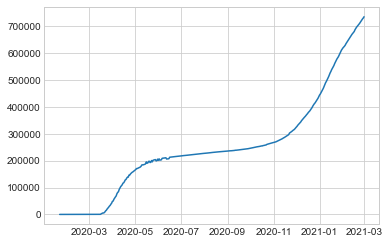

In [102]:
ny_cases = covd_by_state[(covd_by_state['state'] == "NYC")].sort_values(by='Dates')
plt.plot(ny_cases['Dates'], ny_cases['tot_cases'])